# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# StartUp Data

In [ ]:
df = pd.read_csv("/content/50_Startups.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.drop(['State'],axis=1,inplace=True)

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


#Splitting Dependent and Independent Features 

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X.shape

(50, 3)

In [ ]:
y.shape

(50,)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3,random_state=2529)

# Gradient Descent Using Cost Funtion

In [ ]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [ ]:
w, b, c= GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.001,epochs=15000)

Cost is: 6804852738.20719
Cost is: 379532346.3716789
Cost is: 76112731.266644
Cost is: 53883371.94421873
Cost is: 48617288.63369656
Cost is: 45763419.017601386
Cost is: 43951349.59237627
Cost is: 42778430.301573336
Cost is: 42017428.922352165
Cost is: 41523533.23119332


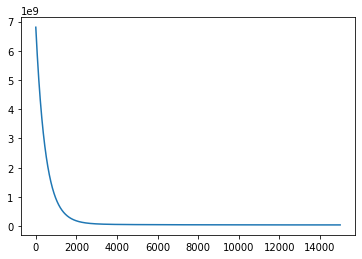

In [ ]:
plt.plot(c)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(X_test, w, b)

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

r2score(y_pred, Y_test)

0.9617470074405586

From the above plot, it can be concluded that when the value of learning rate is increased, it is taking less epochs to reach the minimum cost value whereas when the learning rate is decreased, it takes more epochs to reach the minimum cost value

# User Data

In [ ]:
df1 = pd.read_csv("/content/User_Data.csv")

In [ ]:
df1= df1.drop('User ID',axis=1)

In [ ]:
df1['Gender'] = df1['Gender'].replace(['Male','Female'],[0,1])
df1

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [ ]:
df1.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
X = df1[['Gender','Age','EstimatedSalary']]
X['ones'] = np.ones(len(X))
y =df1.iloc[:,3].values

In [ ]:
X['Age'] = (X['Age'] - X['Age'].mean()) / (X['Age'].max() - X['Age'].min())
X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean()) / (X['EstimatedSalary'].max() - X['EstimatedSalary'].min())

In [ ]:
def gradient_descent(x, y, init_theta,alpha, iterations):
  """
  x : augmented normalised matrix
  y : target variable (not normalised)
  init_theta ->  numpy.array : initial values of theta (length = no. of columns in x)
  alpha : learning parameter
  iterations : no. of iterations

  return:
  values of thetas
  rmse error

  requirements : numpy library imported as np

  """
  theta = init_theta

  error, grd, theta_traj = [], [], []
  for _ in range(iterations):
    h = np.dot(x, theta.T)
    grad = np.dot(x.T, (h - y))
    grd.append(grad)
    theta = theta - alpha * grad * (1 / len(x))

    # log loss
    est_y = np.dot(x, theta)
    est_y = 1 / (1 + np.exp(-est_y))
    t1 = np.log(est_y)
    t2 = np.log(1-est_y)
    t1[t1 == -np.inf] = 0
    t2[t2 == -np.inf] = 0
    ll = np.dot(-np.array(y), t1) - np.dot((1-y), t2)
    if ll == np.nan:
      break
    error.append(ll)
    theta_traj.append(theta)

  return theta, error, grd, theta_traj


theta, error, grd, theta_traj = gradient_descent(X, y, np.array([0,0,0,0]), 0.9, 1000)

In [ ]:
pred_y = np.dot(X, theta)

for i in range(len(pred_y)):
  if pred_y[i] >= 0:
    pred_y[i] = 1
  else:
    pred_y[i] = 0

d = {'Orignal' : y, 'Predicted': pred_y}
df = pd.DataFrame(d)
print('Orignal vs Predicted')
df

Orignal vs Predicted


,Orignal,Predicted
0,0,0.0
1,0,1.0
2,0,0.0
3,0,1.0
4,0,0.0
...,...,...
395,1,1.0
396,1,1.0
397,1,1.0
398,0,1.0


# Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(df['Orignal'], df['Predicted'])

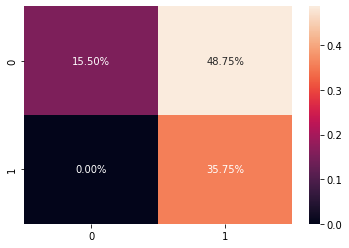

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%')

# Removing Gender

In [ ]:
X = df1[['Age', 'EstimatedSalary']]
# X['ones'] = np.ones(len(X))
y = df1.iloc[:,3].values

X['Age'] = (X['Age'] - X['Age'].mean()) / (X['Age'].max() - X['Age'].min())
X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean()) / (X['EstimatedSalary'].max() - X['EstimatedSalary'].min())

theta, error, grd, theta_traj = gradient_descent(X, y, np.array([0,0]), 0.9999, 1000) 

pred_y = np.dot(X, theta)

for i in range(len(pred_y)):
  if pred_y[i] >= 0:
    pred_y[i] = 1
  else:
    pred_y[i] = 0

d = {'Orignal' : y, 'Predicted': pred_y}
df = pd.DataFrame(d)
print('Orignal vs Predicted')
df

Orignal vs Predicted


,Orignal,Predicted
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
395,1,1.0
396,1,1.0
397,1,1.0
398,0,0.0


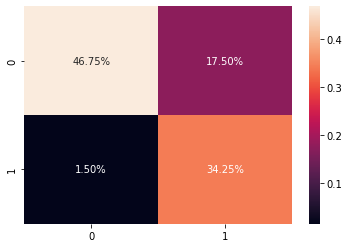

In [ ]:
cf_matrix = confusion_matrix(df['Orignal'], df['Predicted'])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%')

#Contour

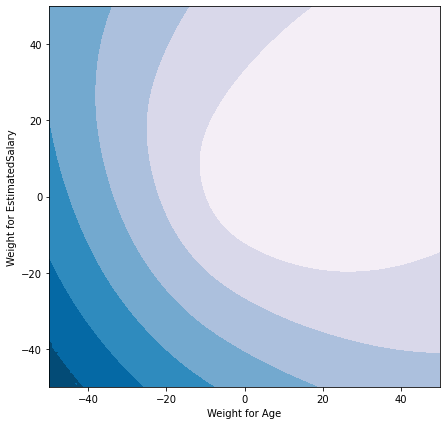

In [ ]:
def plot_contour(theta, data_x):
  xx, yy = np.meshgrid(np.linspace(-50, 50, 200), np.linspace(-50, 50, 200))
  zz = np.zeros(xx.shape)

  for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        theta_new = np.array([xx[i,j],yy[i,j]])
        est_y = np.dot(data_x, theta_new)
        est_y = 1 / (1 + np.exp(-est_y))
        t1 = np.log(est_y)
        t2 = np.log(1-est_y)
        t1[t1 == -np.inf] = 0
        t2[t2 == -np.inf] = 0

        ll = np.dot(-np.array(y), t1) - np.dot((1-y), t2)
        # print(ll)
        zz[i,j] = ll  
    
  plt.figure(figsize = (7,7))
  plt.contourf(xx,yy,zz, cmap = 'PuBu')
  # plt.title(f'learning rate is {l}')
  plt.xlabel('Weight for Age')
  plt.ylabel('Weight for EstimatedSalary')
  plt.show()

plot_contour(theta, X)